# Preparing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import poisson,skellam
import seaborn as sns
# %matploblib inline
mls_data = pd.read_csv(r'C:\Users\Arvind\Desktop\Formula 1 Project\USA.csv')
mls_data['Date'] = pd.to_datetime(mls_data['Date'], format = '%d-%m-%Y')
mls_data = mls_data[mls_data['Date'] < '24/10/2016']

conf = pd.read_csv(r'C:\Users\Arvind\Desktop\Formula 1 Project\mls.csv')
conf['Team 1'] = conf['Team 1'].astype(str)
conf['Team 1'] = conf['Team 1'].str.replace(r"\(.*\)","")
conf['Team 2'] = conf['Team 2'].astype(str)
conf['Team 2'] = conf['Team 2'].str.replace(r"\(.*\)","")
 
conf = conf.groupby(["Conf 1", "Team 1"]).size().reset_index(name="Time")
 
east_list = conf[conf['Conf 1']=='East']['Team 1'].tolist()
west_list = conf[conf['Conf 1']=='West']['Team 1'].tolist()

dct = {('Chicago Fire','Columbus Crew','DC United','CF Montreal','New England Revolution','New York City','New York Red Bulls','Orlando City','Philadelphia Union','Toronto FC'):'East',
       ('Colorado Rapids','FC Dallas','Houston Dynamo','Los Angeles Galaxy','Portland Timbers','Real Salt Lake','San Jose Earthquakes','Seattle Sounders','Sporting Kansas City','Vancouver Whitecaps','Chivas USA'): 'West'}
dct = {i:v for k, v in dct.items() for i in k}
 
mls_data['home_conference'] = mls_data['Home']
mls_data['away_conference'] = mls_data['Away']
mls_data['home_conference'] = mls_data['home_conference'].map(dct)
mls_data['away_conference'] = mls_data['away_conference'].map(dct)
mls_data['same_conference'] = mls_data['home_conference'] == mls_data['away_conference'] 
fitset = mls_data[mls_data['Date'] < '12/7/2015']
mask = (mls_data['Date'] > '12/7/2015') & (mls_data['Date'] < '24/10/2016')
simset = mls_data.loc[mask]
# fitset.head(3)
# simset.head(3)

C:\Users\Arvind\AppData\Roaming\Python\Python38\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '24/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)
<ipython-input-1-19689e5a9892>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  conf['Team 1'] = conf['Team 1'].str.replace(r"\(.*\)","")
<ipython-input-1-19689e5a9892>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  conf['Team 2'] = conf['Team 2'].str.replace(r"\(.*\)","")
C:\Users\Arvind\AppData\Roaming\Python\Python38\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '24/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


# Different conference

In [2]:
# 2.1 -> percentage of matches in different conference (33.6))
print((fitset['home_conference'] == fitset['away_conference']).value_counts(normalize=True)*100)

True     66.374909
False    33.625091
dtype: float64


# Home advantage

home_conference  Res
East             H      53.658537
                 A      24.932249
                 D      21.409214
West             H      51.201479
                 D      25.508318
                 A      23.290203
Name: Res, dtype: float64

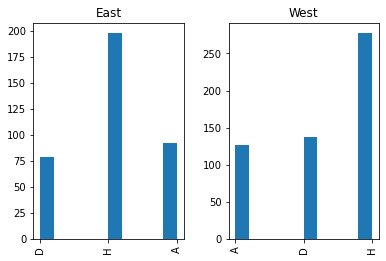

In [3]:
# sns.displot(fitset[(fitset['Same conference']== True)].groupby('home_conference'), stat = "probability",  bins = 20, x='Res', hue = "home_conference", multiple = 'dodge')
# ax = fitset.crosstab(fitset.home_conference, fitset.Res).plot(kind='bar', rot=0)
fitset[fitset['same_conference']==True]['Res'].hist(by=fitset['home_conference']) 
fitset[fitset["same_conference"]==True].groupby('home_conference')['Res'].value_counts(normalize=True)*100
#-------------------------------------------------------------------------------------------------
# 2.2 -> home advantage in east vs west 

In [4]:
dup = fitset
dup['week_number'] = dup['Date'].dt.isocalendar().week
dup['month_number'] = pd.DatetimeIndex(dup['Date']).month
dup['total_goals'] = dup['HG'] + dup['AG']

<ipython-input-4-757299bcd1ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['week_number'] = dup['Date'].dt.isocalendar().week
<ipython-input-4-757299bcd1ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['month_number'] = pd.DatetimeIndex(dup['Date']).month
<ipython-input-4-757299bcd1ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

   # Seasonality

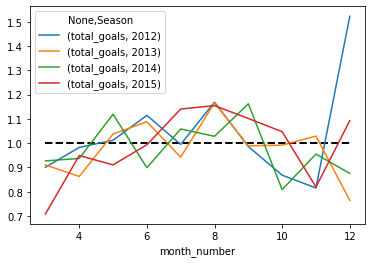

In [5]:
# print(dup.groupby([ 'Season','month_number'])['total_goals'].sum())
# print(dup.groupby(['Season','month_number'])['total_goals'].mean())

#----------------------------------------------------------------------------------
#2.3 -> got the average goals per game by month. NEED TO PLOT AND ANSWER THE QUESTIOn
trend = pd.DataFrame( dup.groupby(['Season','month_number'])['total_goals'].mean()/dup.groupby(['Season'])['total_goals'].mean())
pd.pivot_table(data=trend, index='month_number', columns='Season').plot()
plt.hlines(y=1.0, xmin=3, xmax=12, linewidth=2, color='black', linestyle='dashed')

In [6]:
trend = pd.DataFrame(dup.groupby('month_number')['total_goals'].mean()/dup['total_goals'].mean())
# pd.pivot_table(data=trend, index='month_number').plot()
# plt.hlines(y=1.0, xmin=3, xmax=12, linewidth=2, color='black', linestyle='dashed')
trend['total_goals'][5]
def seasonality(abc):
    return trend['total_goals'][abc]

In [86]:
# skellam.pmf(1.0, dup.mean()[1], dup.mean()[2]) #percentage of matches with 1 goal differnce win to home teams

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mean_goals_total = dup['total_goals'].mean()
mean_goals_home = dup['HG'].mean()
mean_goals_away = dup['AG'].mean()
goal_model_data = pd.concat([dup[['Home','Away','HG']].assign(home=1/2, gamma =1).rename(
            columns={'Home':'attack', 'Away':'defence','HG':'goals'}),
           dup[['Away','Home','AG']].assign(home=-1/2, gamma = 1).rename(
            columns={'Away':'attack', 'Home':'defence','AG':'goals'})])

poisson_model = smf.glm(formula="goals ~ attack + defence + home + gamma -1", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
params = poisson_model.params
params['defence[T.CF Montreal]'] = 0.007327

In [8]:

# np.exp(param_dict['attack['+Home+']'] + param_dict['defence[T.'+Away+']'] + param_dict['gamma'] + param_dict['home']) * seasonality(month)
def calc_means(param_dict, Home, Away, month):
    return [np.exp(param_dict['attack['+Home+']'] + param_dict['defence[T.'+Away+']']  + param_dict['home']/2 + param_dict['gamma']) * seasonality(month),
            np.exp(param_dict['defence[T.'+Home+']'] + param_dict['attack['+Away+']'] - param_dict['home']/2 + param_dict['gamma']) * seasonality(month)]
# calc_means(params, 'DC United','Orlando City')
#----------------------Dixon and Coles method-------------------------------------------------------
def dixon_coles_simulate_match(params_dict, Home, Away, month, max_goals=10):
    team_avgs = calc_means(params_dict, Home, Away, month)
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in team_avgs]
    output_matrix = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))
    output_matrix[:2,:2] = output_matrix[:2,:2]
    return output_matrix

# Forecasting
## ---------------------------------------

In [9]:
score_rates = simset[['Home','Away','Date']]
score_rates['Lambda'] = 0
score_rates['Mu'] = 0
score_rates['Month'] = pd.DatetimeIndex(score_rates['Date']).month
for i in score_rates.index:
    score_rates.iloc[i-1371,3] = calc_means(params, score_rates.iloc[i-1371,0], score_rates.iloc[i-1371,1], score_rates.iloc[i-1371,5])[0]
    score_rates.iloc[i-1371,4] = calc_means(params, score_rates.iloc[i-1371,0], score_rates.iloc[i-1371,1], score_rates.iloc[i-1371,5])[1]    
#-----------------------------------------------5.1-------------------------------------
score_rates.head()

<ipython-input-9-9aa3250a5977>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_rates['Lambda'] = 0
<ipython-input-9-9aa3250a5977>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_rates['Mu'] = 0
<ipython-input-9-9aa3250a5977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,Home,Away,Date,Lambda,Mu,Month
1371,New York Red Bulls,Toronto FC,2016-03-06,2.008246,0.841582,3
1372,Chicago Fire,New York City,2016-03-06,1.651394,1.077655,3
1373,Orlando City,Real Salt Lake,2016-03-06,1.157722,1.199341,3
1374,FC Dallas,Philadelphia Union,2016-03-06,1.594268,0.863421,3
1375,Houston Dynamo,New England Revolution,2016-03-06,1.247904,0.969998,3


In [10]:
score_rates['HomeWin'] = 0
score_rates['Draw'] = 0
score_rates['AwayWin'] = 0
for i in score_rates.index:
    m1 = dixon_coles_simulate_match(params, score_rates.iloc[i-1371,0], score_rates.iloc[i-1371,1], score_rates.iloc[i-1371,5], max_goals=10)
    score_rates.iloc[i-1371,6] = np.round((np.tril(m1).sum()-np.trace(m1))*100,1)
    score_rates.iloc[i-1371,7] = np.round(np.trace(m1)*100,1)
    score_rates.iloc[i-1371,8] = np.round((np.triu(m1).sum()-np.trace(m1))*100,1)
#     m1 = dixon_coles_simulate_match(params, 'DC United','Orlando City', max_goals=10)
#     print(np.round(np.trace(m1)*100,2))
#     print(np.round((np.triu(m1).sum()-np.trace(m1))*100,2))
#     print(np.round((np.tril(m1).sum()-np.trace(m1))*100,2))

#-------------------------------5.2----------------------------------------------------------
score_rates.style.background_gradient(axis=None)
# (score_rates['HomeWin']>score_rates['AwayWin']).value_counts()

<ipython-input-10-25a947b57a39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_rates['HomeWin'] = 0
<ipython-input-10-25a947b57a39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_rates['Draw'] = 0
<ipython-input-10-25a947b57a39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,Home,Away,Date,Lambda,Mu,Month,HomeWin,Draw,AwayWin
1371,New York Red Bulls,Toronto FC,2016-03-06 00:00:00,2.008246,0.841582,3,64.600000,20.600000,14.900000
1372,Chicago Fire,New York City,2016-03-06 00:00:00,1.651394,1.077655,3,50.800000,24.500000,24.800000
1373,Orlando City,Real Salt Lake,2016-03-06 00:00:00,1.157722,1.199341,3,35.000000,28.000000,37.000000
1374,FC Dallas,Philadelphia Union,2016-03-06 00:00:00,1.594268,0.863421,3,54.600000,25.100000,20.300000
1375,Houston Dynamo,New England Revolution,2016-03-06 00:00:00,1.247904,0.969998,3,42.600000,28.600000,28.700000
1376,San Jose Earthquakes,Colorado Rapids,2016-03-06 00:00:00,1.441027,0.804445,3,52.100000,26.900000,21.000000
1377,Portland Timbers,Columbus Crew,2016-03-06 00:00:00,1.539813,0.948492,3,51.100000,25.700000,23.300000
1378,Vancouver Whitecaps,CF Montreal,2016-03-06 00:00:00,1.462332,0.798978,3,52.800000,26.700000,20.500000
1379,Seattle Sounders,Sporting Kansas City,2016-03-07 00:00:00,1.178972,0.795297,3,44.900000,30.300000,24.800000
1380,Los Angeles Galaxy,DC United,2016-03-07 00:00:00,1.774323,0.757881,3,61.600000,22.800000,15.500000


In [11]:
score_rates['GameResult'] = score_rates[['HomeWin','Draw','AwayWin']].idxmax(axis=1)
table = pd.DataFrame(dct.items(), columns=['Team','Conference'])
table = table.reindex(columns = table.columns.tolist() + ['Points'])
table['Points']=0
for i in score_rates.index:
    h = score_rates['Home'][i]
    a = score_rates['Away'][i]
    if score_rates['GameResult'][i]=='HomeWin':
        table.loc[(table['Team']==h), 'Points'] +=score_rates['HomeWin'][i]*3 + score_rates['Draw'][i]*1
    elif score_rates['GameResult'][i]=='AwayWin':
        table.loc[(table['Team']==a), 'Points'] +=score_rates['AwayWin'][i]*3 + score_rates['Draw'][i]*1
    elif score_rates['GameResult'][i]=='Draw':
        table.loc[(table['Team']==a), 'Points'] += score_rates['Draw'][i]*1
        table.loc[(table['Team']==h), 'Points'] += score_rates['Draw'][i]*1
        
#-----------------------------------5.3-------------------------------------------------------
table['Points'] = np.round(table['Points']/100 , 1)
table[table['Conference']=='East'].sort_values(['Points'], ascending=False)


<ipython-input-11-affada21308d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_rates['GameResult'] = score_rates[['HomeWin','Draw','AwayWin']].idxmax(axis=1)


,Team,Conference,Points
6,New York Red Bulls,East,39.8
4,New England Revolution,East,31.3
1,Columbus Crew,East,30.9
2,DC United,East,28.0
3,CF Montreal,East,26.9
0,Chicago Fire,East,26.2
8,Philadelphia Union,East,26.0
5,New York City,East,23.0
7,Orlando City,East,22.6
9,Toronto FC,East,20.1


# Model C

In [14]:

#------------------------------------5.4--------------------------------------------------------
score_rates.style.background_gradient(axis=1)
mls_2016 = pd.read_csv(r'C:\Users\Arvind\Desktop\Formula 1 Project\2016_mls_prediction.csv')
# mls_2016[mls_2016['Home']=='DC United']
model_c = mls_2016[['Home','Away','expected_team1_win','expected_draw','expected_team2_win']]
model_c.tail().style.background_gradient(axis=None)

,Home,Away,expected_team1_win,expected_draw,expected_team2_win
335,New England Revolution,Montreal Impact,0.516506,0.250174,0.233320
336,Seattle Sounders,Real Salt Lake,0.574740,0.243894,0.181367
337,Philadelphia Union,New York Red Bulls,0.350618,0.263984,0.385398
338,Colorado Rapids,Houston Dynamo,0.539732,0.272330,0.187938
339,New York City,Columbus Crew,0.452345,0.244863,0.302792


# Simulation   

In [17]:
score_rates['GameResult'] = score_rates[['HomeWin','Draw','AwayWin']].idxmax(axis=1)
import random
global final_table 
final_table = pd.DataFrame(dct.items(), columns=['Team','Conference'])
# final_table = final_table.reindex(columns = final_table.columns.tolist() + ['Points'])
# final_table['Points']=0
# final_table['GF'] = 0
# final_table['GA'] = 0
# final_table['GD'] = 0
count =0 
def simulate(n):
    global final_table
    global count
    for j in range (1,n):
        
        final_table['Points'] = 0
        final_table['GF'] = 0
        final_table['GA'] = 0
        final_table['GD'] = 0
        for i in score_rates.index:
            odds = random.uniform(0,100)
            h = score_rates['Home'][i]
            a = score_rates['Away'][i]
            hg = score_rates['Lambda'][i]
            ag = score_rates['Mu'][i]
        #     print(hg)
            if (odds > score_rates['HomeWin'][i]):
                final_table.loc[(final_table['Team']==h) , 'Points'] += 3
                final_table.loc[(final_table['Team']==h) , 'GF'] += np.round(hg)
                final_table.loc[(final_table['Team']==h) , 'GA'] += np.round(ag)
            elif (odds <= score_rates['AwayWin'][i]):
        #         table.loc[(table['Team']==a), 'Points'] +=score_rates['AwayWin'][i]*3 + score_rates['Draw'][i]*1
                final_table.loc[(final_table['Team']==a) , 'Points'] +=3
                final_table.loc[(final_table['Team']==a) , 'GF'] += np.round(ag)
                final_table.loc[(final_table['Team']==a) , 'GA'] += np.round(hg)
            else:
                final_table.loc[(table['Team']==a) , 'Points'] += 1
                final_table.loc[(table['Team']==h) , 'Points'] += 1
                final_table.loc[(final_table['Team']==a) , 'GF'] += np.round(ag)
                final_table.loc[(final_table['Team']==a) ,  'GA'] += np.round(hg)
                final_table.loc[(final_table['Team']==h) , 'GF'] += np.round(ag)
                final_table.loc[(final_table['Team']==h) , 'GA'] += np.round(hg)
        final_table['GD'] = final_table['GF']-final_table['GA']
        final_table = final_table.sort_values(['Conference','Points','GD'], ascending=False)
        ser = final_table[final_table['Conference']=='West']['Team']=='Los Angeles Galaxy'
        ser = ser.reset_index().idxmax()['Team']+1
        if (ser<=2):
            count += 1;
        print(j, odds)
    return count # if you want the number of times LA Galaxy finish top 2
    return final_table #if you want the final ordered table
#-----------------------------------6.2-------------------------------------------------------
simulate(50) #input how many times you want to run the simulation for

<ipython-input-17-43c3ca4ac5da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_rates['GameResult'] = score_rates[['HomeWin','Draw','AwayWin']].idxmax(axis=1)


1 60.894410181930866
2 46.416306642231184
3 57.169913779924386
4 75.42938552945192
5 69.04848495306241
6 84.00012966105155
7 18.848446029303044
8 14.54040804697705
9 73.89483312122839
10 12.864505722222287
11 22.165634912328404
12 64.24794222387305
13 97.95501691956342
14 89.3747694404126
15 59.83486272925541
16 93.31019083312518
17 81.7778319099795
18 80.38734316634876
19 1.0239121506676496
20 50.13714811994677
21 42.99719771538118
22 90.22709884275181
23 2.3703718119774897
24 44.00632301913057
25 51.91643657797024
26 59.300614684289876
27 5.164317537129093
28 17.800295160003575
29 64.72855697502182
30 63.56436718319286
31 69.99407145020692
32 50.77422015593122
33 77.59305500610108
34 2.928987749658174
35 78.17603658922529
36 40.00014911585297
37 58.75616085228573
38 57.24150366878068
39 48.077841568479954
40 49.554685585114456
41 78.73478243130559
42 91.36179665978923
43 61.53753197401153
44 12.12279920258995
45 38.03455743282317
46 73.4345478173349
47 83.63878965617089
48 98.7912512

8

In [18]:
final_table

,Team,Conference,Points,GF,GA,GD
11,FC Dallas,West,52,30,32,-2
17,Seattle Sounders,West,51,26,30,-4
13,Los Angeles Galaxy,West,50,32,34,-2
12,Houston Dynamo,West,50,26,36,-10
15,Real Salt Lake,West,49,26,28,-2
16,San Jose Earthquakes,West,47,26,28,-2
14,Portland Timbers,West,46,31,34,-3
10,Colorado Rapids,West,46,22,26,-4
18,Sporting Kansas City,West,45,26,24,2
19,Vancouver Whitecaps,West,36,20,19,1


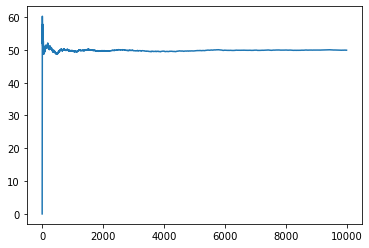

In [28]:
import random
x = [0]
y = [0]
sum = 0
count =0
for i in range(1,10000):
    nu = random.uniform(0,100)
    count += 1
    x.append(count)
    sum += nu
    y.append(sum/count)
plt.plot(x, y)

In [37]:
init_vals = np.concatenate((np.random.uniform(0,1,(20)), # attack strength
                                      np.random.uniform(0,-1,(20)), # defence strength
                                      np.array([0, 1.0]) # rho (score correction), gamma (home advantage)
                                     ))
init_vals

array([ 0.28908121,  0.07306981,  0.35319364,  0.03467572,  0.4654059 ,
        0.577727  ,  0.54357396,  0.35297689,  0.38741514,  0.55145341,
        0.9302221 ,  0.03180299,  0.71268063,  0.42117417,  0.01612665,
        0.06891433,  0.53368033,  0.13121534,  0.72024975,  0.32268243,
       -0.11513488, -0.75853419, -0.89736403, -0.67745255, -0.1946737 ,
       -0.49429252, -0.10031916, -0.22203842, -0.72893965, -0.54902471,
       -0.63075232, -0.10960599, -0.18070698, -0.05353045, -0.44472804,
       -0.78361904, -0.38990831, -0.37723774, -0.2990361 , -0.45040583,
        0.        ,  1.        ])

In [78]:
from sklearn import linear_model
import statsmodels.api as sm
x = result[['HAS', 'ADS', 'home_mean']]
y = result[['HG']]
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [-2.80914984]
Coefficients: 
 [[1.5306672  0.97327129 0.90354945]]
                            OLS Regression Results                            
Dep. Variable:                     HG   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     76.18
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.44e-45
Time:                        14:15:49   Log-Likelihood:                -2101.3
No. Observations:                1371   AIC:                             4211.
Df Residuals:                    1367   BIC:                             4231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Text(0.5, 1.0, 'Number of Goals Scored Per Match')

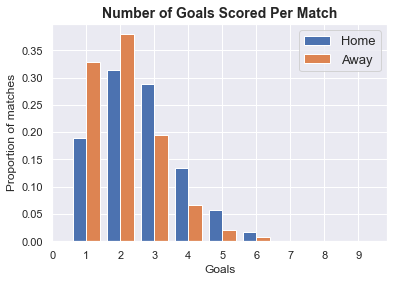

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

max_goals = 10
plt.hist(
    dup[["HG", "AG"]].values, range(max_goals), label=["Home", "Away"], density=True
)
plt.xticks([i - 0.5 for i in range(max_goals)], [i for i in range(max_goals)])
plt.xlabel("Goals")
plt.ylabel("Proportion of matches")
plt.legend(loc="upper right", fontsize=13)
plt.title("Number of Goals Scored Per Match", size=14, fontweight="bold")

Text(0.5, 1.0, 'Number of Goals Scored Per Match')

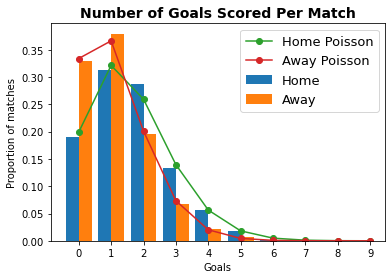

In [126]:
import numpy as np
from scipy.stats import poisson

home_poisson = poisson.pmf(range(10), dup["HG"].mean())
away_poisson = poisson.pmf(range(10), dup["AG"].mean())

max_goals = 10
plt.hist(
    dup[["HG", "AG"]].values, range(max_goals), label=["Home", "Away"], density=True
)

plt.plot(
    [i - 0.5 for i in range(1, max_goals + 1)],
    home_poisson,
    linestyle="-",
    marker="o",
    label="Home Poisson",
)

plt.plot(
    [i - 0.5 for i in range(1, max_goals + 1)],
    away_poisson,
    linestyle="-",
    marker="o",
    label="Away Poisson",
)


plt.xticks([i - 0.5 for i in range(1, max_goals + 1)], [i for i in range(max_goals)])
plt.xlabel("Goals")
plt.ylabel("Proportion of matches")
plt.legend(loc="upper right", fontsize=13)
plt.title("Number of Goals Scored Per Match", size=14, fontweight="bold")

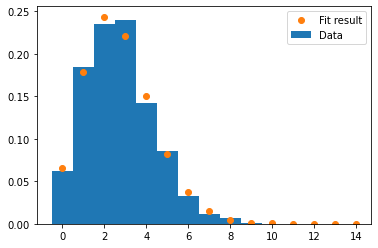

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# get poisson deviated random numbers
data = dup['total_goals']

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(11) - 0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()